# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## (1)
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

## (2)
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи
- (текст) формулировка признакового описания объектов
- (текст) формулировка функции ошибки
- (текст) формулировка меры качества модели
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных данных
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости)
- (код, результаты, коммментарии) обучение модели методом градиентного спуска
- (код, результаты, комментарии) оценка качества модели на валидационной выборке

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона (имеется в виду только один скрытый слой);
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.

#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной;
- отдельные экземпляры выборки в виде изображений;
- эволюция функции ошибки по ходу обучения;
- эволюция метрики(метрик) по ходу обучения

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перектрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = \sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

# Моё решение

In [1]:
import numpy as np

In [ ]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [4]:
mnist = np.load('./mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
# Обратите внимание на то, что целевая переменная в виде целых чисел от 0 до 9, в то время как в формулах,
# приведенных выше, подразумевается one-hot кодирование целевой переменной
x_test = mnist['x_test']
y_test = mnist['y_test']

In [5]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

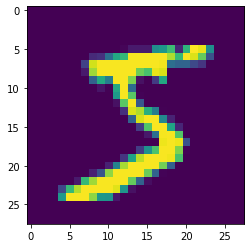

5


In [9]:
plt.imshow(x_train[0, :, :]) # пример данных
plt.show()
print(y_train[0]) # такргетное значение

In [11]:
X_train = x_train.reshape([-1, 28 * 28]) # переводим трёхмерный тензор в двумерный
X_test = x_test.reshape([-1, 28 * 28])

In [12]:
X_train.shape

(60000, 784)

In [17]:
class Differentiable:
    def __init__(self):
        self.state = None
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()

в качестве функции потерь используем перектрестную энтропию в многоклассовом варианте:
$$
{\mathscr{L}}\left(\hat{y},y\right) = \sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$, то есть вероятность принадлежать классу, которую предсказывает наша модель. В векторном виде $\vec{y^T}  \ln \vec{\hat{y}}$. Градиент по входному значению $ \vec{\hat{y}} $ равен $ \vec{y} $

In [ ]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_true, y_pred):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        loss_value = 0.0
        self.state = 0.0
        
        ### YOUR CODE HERE
        loss_value = y_true.dot(np.log(y_true))[0]
                
        return loss_value
    
    
    def backward(self, y_true, y_pred):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        partial_grad = np.zeros_like(y_pred)
        
        ### YOUR CODE HERE
        partial_grad = y_true
        
        return partial_grad

Этот класс мы прописали в предыдущем задании. Только теперь в backward реализуем абстрактно от входного вектора

In [ ]:
class Linear(Differentiable):
    def __init__(self):
        super(Linear, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, y_in):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        partial_grad = y_in
        
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = np.random.normal(scale=0.01, size = (X.shape[1], 1))
        
        
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        y_pred = X.dot(self.theta)
        
        return y_pred

Возьмём функцию активации `sigmoid`

In [ ]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
        self.theta = None
    
    def __call__(self, **kwargs):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, **kwargs):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        # partial_grad = ...
        
        return partial_grad
    
    def forward(self, **kwargs):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        # y_pred = ...
        
        return y_pred

в качестве функции активации $\Psi$ используем `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
Как описано в условии задания `softmax` не численно стабильный и нужно рассмотреть случаи, когда показатель экспоненты либо очень большое число, или наоборот достаточно маленькое.

Для защиты от этого воспользуемся свойством `softmax`, что $softmax(x) = softmax(x+c)$ для любой константы $c$. Следовательно, можем вычисть максимальный элемент в исходном векторе из всех элементов, то есть для входного вектора $x$ определим $z$ так, чтобы: $z = x - \max(x) $ и затем будем брать `softmax` от вектора z, который будет стабильным 

Вычисляем градиент от `softmax`: 

$$\begin{equation}\frac{\partial \operatorname{smax}\left(x_{i}\right)}{\partial x_{i}}=\frac{f^{\prime}(x) g(x)-f(x) g^{\prime}(x)}{g(x)^{2}}\end{equation} $$

$$ \begin{equation}=\frac{e^{x_{i}} \sum_{j=1}^{|X|} e^{x_{j}}-e^{x_{i}} \frac{\partial}{x_{i}} \sum_{j=1}^{|X|} e^{x_{j}}}{\left(\sum_{j=1}^{|X|} e^{x_{j}}\right)^{2}}\end{equation} $$

$$\begin{equation}=\frac{e^{x_{i}} \sum_{j=1}^{|X|} e^{x_{j}}-\left(e^{x_{i}}\right)^{2}}{\left(\sum_{j=1}^{|X|} e^{x_{j}}\right)^{2}}\end{equation} $$

$$ \begin{equation}=\left(\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}} \frac{\sum_{j=1}^{|X|} e^{x_{j}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\right)-\left(\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}} \frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\right)\end{equation}$$

$$ \begin{equation}=\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\left(1-\frac{e^{x_{i}}}{\sum_{j=1}^{|X|} e^{x_{j}}}\right)\end{equation}$$

$$\begin{equation}=\operatorname{smax}\left(x_{i}\right)\left(1-\operatorname{smax}\left(x_{i}\right)\right)\end{equation} $$


В numpy: $smax(\vec{x}) \times (1 - smax(\vec{x}))$ 

In [ ]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        self.theta = None
    
    def __call__(self, **kwargs):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, y_in):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        partial_grad = Softmax(y_in) * (1 - Softmax(y_in))
        return partial_grad
    
    def forward(self, y_in):  
        y_pred = np.zeros_like(y_in)
        
        z = y_in - np.max(y_in) #для того чтобы сделать softmax численно стабильным
        denominator = 0.0
        for el in z:
            denominator += np.exp(el)

        y_pred = [np.exp(a) / denominator for a in z]
        return y_pred

In [ ]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.modules = None
        self.parameters = None
    
    def __call__(self, **kwargs):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, **kwargs):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        grad = 0.0
        
        ### YOUR CODE HERE
        # partial_grad = ...
        
        return partial_grad
    
    def forward(self, **kwargs):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        # y_pred = ...
        
        return y_pred

In [ ]:
def train_loop(X, y, model, loss_fn, epochs=100):
    loss_history = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        ### YOUR CODE HERE
        # loss_value = ...
        # grad = ...
        # model.theta = ...
        
        loss_history.append(loss_value)
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value})
    pbar.close()
    return loss_history

In [ ]:
obj_fn = loss()
model = Perceptron()
loss_history = train_loop(Xtr, ytr, lr_model, obj_fn, epochs=1000)